# Tanzanian Water Wells Status Prediction

By Melody Bass



![

## Introduction

The focus of this project is to build a classification model to predict the status of water wells in Tanzania.  The model was built from a dataset of the sources of water and status of the waterpoint using an iterative approach and can be found [here](./data/training_set_values.csv).  The dataset contains information on 54,000 waterpoints in Tanzania.  Following is a description of the features that we will include in our model:
* `amount_tsh` - Total static head (amount water available to waterpoint)
* `date_recorded` - The date the row was entered
* `funder` - Who funded the well
* `gps_height` - Altitude of the well
* `installer` - Organization that installed the well
* `longitude` - GPS coordinate
* `latitude` - GPS coordinate
* `wpt_name` - Name of the waterpoint if there is one
* `num_private` -
* `basin` - Geographic water basin
* `subvillage` - Geographic location
* `region` - Geographic location
* `region_code` - Geographic location (coded)
* `district_code` - Geographic location (coded)
* `lga` - Geographic location
* `ward` - Geographic location
* `population` - Population around the well
* `public_meeting` - True/False
* `recorded_by` - Group entering this row of data
* `scheme_management` - Who operates the waterpoint
* `scheme_name` - Who operates the waterpoint
* `permit` - If the waterpoint is permitted
* `construction_year` - Year the waterpoint was constructed
* `extraction_type` - The kind of extraction the waterpoint uses
* `extraction_type_group` - The kind of extraction the waterpoint uses
* `extraction_type_class` - The kind of extraction the waterpoint uses
* `management` - How the waterpoint is managed
* `management_group` - How the waterpoint is managed
* `payment` - What the water costs
* `payment_type` - What the water costs
* `water_quality` - The quality of the water
* `quality_group` - The quality of the water
* `quantity` - The quantity of water
* `quantity_group` - The quantity of water
* `source` - The source of the water
* `source_type` - The source of the water
* `source_class` - The source of the water
* `waterpoint_type` - The kind of waterpoint
* `waterpoint_type_group` - The kind of waterpoint

The first sections focus on investigating, cleaning, wrangling, and engineering some new features.  The next section contains models and evaluation of each, ultimately leading to us to select our best model for predicting waterpoint status.  Finally, I will make recommendations and provide insight on predicting the status of waterpoints making predictions from historical data.

## Business Problem

## Data Understanding

The dataset used for this analysis can be found [here](./data/training_set_values.csv).  It contains a wealth of information about waterpoints in Tanzania and the status of their operation.  The target variable has 3 different options for it's status:
* `functional` - the waterpoint is operational and there are no repairs needed
* `functional needs repair` - the waterpoint is operational, but needs repairs
* `non functional` - the waterpoint is not operational

Below I will import the dataset and start my investigation of relevant information it may contain.  Let's get started! 

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import plot_confusion_matrix, classification_report,accuracy_score, f1_score, precision_score, recall_score

# Scalers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Categorical Create Dummies
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Data Import Train Set
df_train_set = pd.read_csv('data/training_set_values.csv', index_col='id')
df_train_set

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [3]:
# Data import Training set labels
df_train_labels = pd.read_csv('data/training_set_labels.csv', index_col='id')
df_train_labels

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
...,...
60739,functional
27263,functional
37057,functional


In [4]:
#Merge datasets
df = pd.merge(df_train_labels, df_train_set, how = 'inner', on='id')

In [5]:
#Reset index
df.reset_index(inplace=True)
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [7]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
sum(df.duplicated())

0

In [9]:
for col in df.columns:
    print(df[col].value_counts())

2047     1
72310    1
49805    1
51852    1
62091    1
        ..
46396    1
36155    1
34106    1
38200    1
0        1
Name: id, Length: 59400, dtype: int64
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-12      1
2011-09-17      1
2011-09-18      1
2011-09-21      1
2011-09-14      1
Name: date_recorded, Length: 356, dtype: int64
Government Of Tanzania         9084
Danida                         3114
Hesawa                         2202
Rwssp                          1374
World Bank                     1349
                               ... 
Doner A

In [10]:
# Check null values
df.isna().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [11]:
# Check unique values for categorical data
obj_df = df.select_dtypes(include=['object'])
obj_df.nunique()

status_group                 3
date_recorded              356
funder                    1897
installer                 2145
wpt_name                 37400
basin                        9
subvillage               19287
region                      21
lga                        125
ward                      2092
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
dtype: int64

### Initial Observations

#### Missing Values

__scheme_name__ has the most missing values, followed by __funder__, __installer__,  __public_meeting__, __scheme_management__,  and __permit__ with ~3,000 null values, and then __subvillage__ with 371 null values.  Several of these columns will be deleted as they appear to duplicate other columns, and I will investigate __installer__, __permit__, and __subvillage__ further.

#### Data types

* __wpt_name__, __subvillage__, __ward__, __scheme_name__, __installer__, __funder__, and __date_recorded__ are categorical features that have unique values in the thousands.  This will be a problem with dummy variables, will likely remove. 
* I will drop __recorded_by__ as it has the same value for all rows.
* __num_private__ is not defined on the DrivenData site, and it is not obvious what the feature indicates. 
* __id__ column will be dropped.
* __public_meeting__ and __permit__ are boolean.
* __construction_year__, __latitude__, __longitude__, __gps_height, __amount_tsh__, and __population__ all have thousands of rows of 0 entered.  I will drop rows for most of these variables that have 0 entered, and will have to investigate further for real data on some columns.  
 
#### Duplicate  and Similar Data
 
The following columns all contain duplicate or similar data, will remove features that will cause multicollinearity:
* __extraction_type__, __extraction_type_group__, and __extraction_type_class__
* __payment__ and __payment_type__
* __water_quality__ and __quality_group__ 
* __quanitity__ and __quantity_group__
* __source__ and __source_type__
* __waterpoint_type__ and __waterpoint_type_group__
* __region__ and __region_code__

## Data Cleaning

In this section, I will clean the dataset by removing similar and unnecessary columns and trim the dataset of remaining null values.  I will also further investigate whether some columns contain the same information if it was not immediately obvious.  There are several rows containing 0 enteries in some column information.  I will investigate whether I believe the data to be real instead of a placeholder.

### Drop duplicate and columns with similar information

I will keep __extraction_type_class__ and remove __extraction_type__ and __extraction_type_group__ as it's columns values appear to be the most relevant for the project. __scheme_name__ will be dropped for it's many null values.  Other columns will be removed at this point due to irrelavancy, duplicates, null values, and some others will have to be investigated after the first drop.

In [12]:
# Columns to be dropped
dropped_columns = ['extraction_type', 'extraction_type_group', 'payment', 'scheme_name', 'quality_group',
                   'quantity_group', 'source', 'waterpoint_type_group', 'recorded_by', 'num_private', 'id', 'subvillage',
                  'wpt_name', 'ward', 'funder', 'date_recorded', 'public_meeting', 'region_code', 'district_code', 'lga',
                  'scheme_management', 'source_class']

In [13]:
df = df.drop(dropped_columns, axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   amount_tsh             59400 non-null  float64
 2   gps_height             59400 non-null  int64  
 3   installer              55745 non-null  object 
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   population             59400 non-null  int64  
 9   permit                 56344 non-null  object 
 10  construction_year      59400 non-null  int64  
 11  extraction_type_class  59400 non-null  object 
 12  management             59400 non-null  object 
 13  management_group       59400 non-null  object 
 14  payment_type           59400 non-null  object 
 15  wa

### Dealing with null values

In [15]:
#Check for nulls
df.isna().sum()

status_group                0
amount_tsh                  0
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
region                      0
population                  0
permit                   3056
construction_year           0
extraction_type_class       0
management                  0
management_group            0
payment_type                0
water_quality               0
quantity                    0
source_type                 0
waterpoint_type             0
dtype: int64

In [16]:
# Drop all remaining null values from our dataset
df = df.dropna()

In [17]:
#Check to see that it worked
df.isna().sum()

status_group             0
amount_tsh               0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
population               0
permit                   0
construction_year        0
extraction_type_class    0
management               0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source_type              0
waterpoint_type          0
dtype: int64

In [18]:
# Convert boolean permit to integers
df['permit'] = df['permit'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55102 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           55102 non-null  object 
 1   amount_tsh             55102 non-null  float64
 2   gps_height             55102 non-null  int64  
 3   installer              55102 non-null  object 
 4   longitude              55102 non-null  float64
 5   latitude               55102 non-null  float64
 6   basin                  55102 non-null  object 
 7   region                 55102 non-null  object 
 8   population             55102 non-null  int64  
 9   permit                 55102 non-null  int64  
 10  construction_year      55102 non-null  int64  
 11  extraction_type_class  55102 non-null  object 
 12  management             55102 non-null  object 
 13  management_group       55102 non-null  object 
 14  payment_type           55102 non-null  object 
 15  wa

### Investigate management and management_group

I need to investigate these 2 columns further to see if they contain similar information.

In [20]:
df['management'].value_counts()

vwc                 37416
wug                  6314
water board          2705
wua                  2307
private operator     1891
parastatal           1588
water authority       825
other                 733
company               656
unknown               491
other - school         99
trust                  77
Name: management, dtype: int64

In [21]:
df['management_group'].value_counts()

user-group    48742
commercial     3449
parastatal     1588
other           832
unknown         491
Name: management_group, dtype: int64

The most data is contained in the user-group subcategory of __management_group__.  I will groupby to investigate if the information is similar.

In [22]:
df.loc[df['management_group']=='user-group']['management'].value_counts()

vwc            37416
wug             6314
water board     2705
wua             2307
Name: management, dtype: int64

The data is identical to the data contained in the management column in the subcategory of 'user-group'.  I will drop __management_group__ from our features.

In [23]:
#Drop column
df = df.drop('management_group', axis=1)

In [24]:
#Check to see that it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55102 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           55102 non-null  object 
 1   amount_tsh             55102 non-null  float64
 2   gps_height             55102 non-null  int64  
 3   installer              55102 non-null  object 
 4   longitude              55102 non-null  float64
 5   latitude               55102 non-null  float64
 6   basin                  55102 non-null  object 
 7   region                 55102 non-null  object 
 8   population             55102 non-null  int64  
 9   permit                 55102 non-null  int64  
 10  construction_year      55102 non-null  int64  
 11  extraction_type_class  55102 non-null  object 
 12  management             55102 non-null  object 
 13  payment_type           55102 non-null  object 
 14  water_quality          55102 non-null  object 
 15  qu

In [25]:
for col in df.columns:
    print(df[col].value_counts())

functional                 29885
non functional             21381
functional needs repair     3836
Name: status_group, dtype: int64
0.0        37811
500.0       3071
50.0        2333
1000.0      1442
20.0        1427
           ...  
38000.0        1
1400.0         1
8500.0         1
6300.0         1
26.0           1
Name: amount_tsh, Length: 95, dtype: int64
 0       18310
-15         54
 303        51
-16         51
-13         50
         ...  
 2424        1
 2405        1
 2628        1
 2552        1
 2576        1
Name: gps_height, Length: 2426, dtype: int64
DWE               17361
Government         1788
RWE                1203
Commu              1060
DANIDA             1049
                  ...  
Tumaini fund          1
NGINIL                1
Shallow well          1
J mal Abdallah        1
Dydrotec              1
Name: installer, Length: 2056, dtype: int64
0.000000     1793
32.984790       2
37.540901       2
37.328905       2
37.252194       2
             ... 
39.002868   

After our first round of cleaning, there are several features we need to examine further:
* __status_group__ is an unbalanced target, may need to look into further during modeling.
* There are several columns with thousands of 0 entries - __amount_tsh__, __gps_height__, __longitude__, __latitude__, __population__, __construction_year__.

### Construction year

In [26]:
df['construction_year'].value_counts()

0       18392
2008     2568
2009     2490
2010     2427
2000     1565
2007     1557
2006     1447
2003     1276
2011     1211
2004     1107
2002     1064
1978     1027
2012     1025
2005      983
1995      978
1999      950
1985      941
1998      921
1984      777
1996      766
1982      741
1972      705
1994      703
1974      675
1990      666
1980      647
1992      632
1997      612
1993      595
2001      530
1988      520
1983      487
1975      437
1986      431
1976      411
1991      322
1989      316
1970      310
1987      297
1981      237
1977      199
1979      192
1973      183
2013      173
1971      145
1963       84
1967       83
1968       68
1969       59
1960       45
1964       40
1962       29
1961       20
1965       19
1966       17
Name: construction_year, dtype: int64

In [27]:
# Finding mean and median without zero values
df.loc[df['construction_year']!=0].describe()

,amount_tsh,gps_height,longitude,latitude,population,permit,construction_year
count,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000
mean,471.881843,982.395015,36.015003,-6.358975,268.881694,0.717379,1996.888096
std,3074.841656,623.784917,2.609370,2.762486,542.812926,0.450280,12.452883
min,0.000000,-63.000000,29.607122,-11.649440,0.000000,0.000000,1960.000000
25%,0.000000,351.000000,34.671850,-8.855908,30.000000,0.000000,1987.000000
50%,0.000000,1116.500000,36.691907,-6.351197,150.000000,1.000000,2000.000000
75%,200.000000,1471.000000,37.896261,-3.731978,304.000000,1.000000,2008.000000
max,250000.000000,2770.000000,40.345193,-1.042375,30500.000000,1.000000,2013.000000


In [28]:
#Replace 0 values in construction_year with mean of data without 0s.
df['construction_year'].replace(to_replace = 0, value = 1996, inplace=True)

In [29]:
#Check to see if it worked
df['construction_year'].value_counts()

1996    19158
2008     2568
2009     2490
2010     2427
2000     1565
2007     1557
2006     1447
2003     1276
2011     1211
2004     1107
2002     1064
1978     1027
2012     1025
2005      983
1995      978
1999      950
1985      941
1998      921
1984      777
1982      741
1972      705
1994      703
1974      675
1990      666
1980      647
1992      632
1997      612
1993      595
2001      530
1988      520
1983      487
1975      437
1986      431
1976      411
1991      322
1989      316
1970      310
1987      297
1981      237
1977      199
1979      192
1973      183
2013      173
1971      145
1963       84
1967       83
1968       68
1969       59
1960       45
1964       40
1962       29
1961       20
1965       19
1966       17
Name: construction_year, dtype: int64

### Latitude/Longitude zeros

In [30]:
df.longitude.value_counts()

0.000000     1793
32.984790       2
37.540901       2
37.328905       2
37.252194       2
             ... 
39.002868       1
37.095964       1
36.658462       1
33.116994       1
38.592731       1
Name: longitude, Length: 53261, dtype: int64

In [31]:
# Investigate longitude entries that are 0
df.loc[df['longitude'] == 0]

,status_group,amount_tsh,gps_height,installer,longitude,latitude,basin,region,population,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quantity,source_type,waterpoint_type
21,functional,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,handpump,wug,unknown,unknown,unknown,shallow well,hand pump
53,non functional,0.0,0,Government,0.0,-2.000000e-08,Lake Victoria,Mwanza,0,1,1996,submersible,vwc,unknown,unknown,dry,borehole,communal standpipe multiple
168,functional,0.0,0,WVT,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,gravity,parastatal,other,soft,seasonal,rainwater harvesting,communal standpipe
177,non functional,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,other,wug,unknown,soft,enough,shallow well,other
253,functional needs repair,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Mwanza,0,1,1996,handpump,vwc,never pay,soft,insufficient,shallow well,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,functional needs repair,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,handpump,wug,other,soft,enough,shallow well,hand pump
59208,functional,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,handpump,wug,unknown,soft,enough,shallow well,hand pump
59295,functional needs repair,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,handpump,wug,never pay,soft,enough,shallow well,hand pump
59324,functional,0.0,0,World Vision,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,handpump,wug,unknown,soft,enough,shallow well,hand pump


The 0s that are entered into the longitude column are also 0s in gps_height and -2e8 for latitude columns.  I will drop these values from the dataset.

In [32]:
# Drop rows with 0 entered in longitude column
df = df.loc[df['longitude'] != 0]

In [33]:
# Check to see if it worked
df.describe()

,amount_tsh,gps_height,longitude,latitude,population,permit,construction_year
count,53309.000000,53309.000000,53309.000000,53309.000000,53309.000000,53309.000000,53309.000000
mean,337.580181,692.509670,35.186804,-5.849440,188.814515,0.702508,1996.611567
std,2714.547122,691.264883,2.670974,2.806529,474.147131,0.457159,10.341978
min,0.000000,-90.000000,29.607122,-11.649440,0.000000,0.000000,1960.000000
25%,0.000000,0.000000,33.167340,-8.441371,0.000000,0.000000,1995.000000
50%,0.000000,438.000000,35.295878,-5.144420,45.000000,1.000000,1996.000000
75%,40.000000,1322.000000,37.353028,-3.359390,240.000000,1.000000,2005.000000
max,250000.000000,2770.000000,40.345193,-0.998464,30500.000000,1.000000,2013.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53309 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           53309 non-null  object 
 1   amount_tsh             53309 non-null  float64
 2   gps_height             53309 non-null  int64  
 3   installer              53309 non-null  object 
 4   longitude              53309 non-null  float64
 5   latitude               53309 non-null  float64
 6   basin                  53309 non-null  object 
 7   region                 53309 non-null  object 
 8   population             53309 non-null  int64  
 9   permit                 53309 non-null  int64  
 10  construction_year      53309 non-null  int64  
 11  extraction_type_class  53309 non-null  object 
 12  management             53309 non-null  object 
 13  payment_type           53309 non-null  object 
 14  water_quality          53309 non-null  object 
 15  qu

Looks like it all worked!  I believe the __amount_tsh__ and __population__ 0 values are real so I will leave all data as is for vanilla models.

### Installer - Several different spellings for same installer

In [35]:
#Check unique values after inital cleaning
df.nunique()

status_group                 3
amount_tsh                  95
gps_height                2426
installer                 2024
longitude                53260
latitude                 53262
basin                        9
region                      21
population                1026
permit                       2
construction_year           54
extraction_type_class        7
management                  12
payment_type                 7
water_quality                8
quantity                     5
source_type                  7
waterpoint_type              7
dtype: int64

Upon checking the unique values for our categorical variables after trimming the dataset, installer still has 2024 unique entries, which will be a problem when we create dummies.  We will need to cut down the amount of unique entries to not overload our model.

In [36]:
#Investigate 2024 unique values for installer
pd.set_option("display.max_rows", None)
df['installer'].value_counts()

DWE                               16214
Government                         1633
RWE                                1178
Commu                              1060
DANIDA                             1049
KKKT                                894
0                                   777
TCRS                                702
Hesawa                              647
Central government                  619
CES                                 610
DANID                               552
District Council                    546
Community                           538
HESAWA                              528
LGA                                 408
World vision                        408
WEDECO                              397
District council                    391
Gover                               383
TASAF                               371
TWESA                               316
AMREF                               313
WU                                  301
Dmdd                                286


There are several entries with typos and different variations of the same installer. I will attempt to fix some of the clerical errors and narrow down the amount of unique identifiers we will use for our model.

In [37]:
# Correct variations and misspellings in the installer column
df['installer'] = df['installer'].replace(to_replace = ('Central government', 'Tanzania Government',
                                          'Cental Government','Tanzania government','Cebtral Government', 
                                          'Centra Government', 'central government', 'CENTRAL GOVERNMENT', 
                                          'TANZANIA GOVERNMENT','Central govt', 'Centr', 'Centra govt', 
                                          'Tanzanian Government', 'Tanzania'), value = 'Central Government')

df['installer'] = df['installer'].replace(to_replace = ('District COUNCIL', 'DISTRICT COUNCIL',
                                          'Counc','District council','District Counci', 
                                          'Council', 'COUN', 'Distri', 'District  Council'), 
                                          value = 'District Council')

df['installer'] = df['installer'].replace(to_replace = ('villigers', 'villager', 'villagers', 'Villa', 'Village',
                                          'Villi', 'Village Council', 'Village Counil', 'Villages', 'Vill', 
                                          'Village community', 'Villaers', 'Village Community', 'Villag',
                                          'Villege Council', 'Village council', 'Village Council', 'Villagerd', 
                                          'Villager', 'Village Technician', 'Village Office', 'VILLAGE COUNCIL',
                                          'Village community members', 'VILLAG', 'Village Government', 
                                          'Village govt', 'VILLAGERS', 'Village  Council'), value ='Villagers')

df['installer'] = df['installer'].replace(to_replace = ('District Water Department', 'District water depar',
                                          'Distric Water Department'), value ='District water department')

df['installer'] = df['installer'].replace(to_replace = ('FinW', 'Fini water', 'FINI WATER', 'FIN WATER',
                                          'Finwater', 'FINN WATER', 'FinW', 'FW', 'FinWater', 'FiNI WATER'), 
                                          value ='Fini Water')

df['installer'] = df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC', 'RC Ch', 'RC C', 'RC CH',
                                          'RC church', 'RC CATHORIC', 'Ch') , value ='RC Church')

df['installer'] = df['installer'].replace(to_replace = ('world vision', 'World Division', 'World vision', 
                                          'WORLD VISION', 'World Vission'), value ='World Vision')

df['installer'] = df['installer'].replace(to_replace = ('Unisef','Unicef'), value ='UNICEF')

df['installer'] = df['installer'].replace(to_replace = 'DANID', value ='DANIDA')

df['installer'] = df['installer'].replace(to_replace =('Commu', 'Communit', 'commu', 'COMMU', 'COMMUNITY', 
                                          'Adra /Community', 'Communit', 'Adra/Community', 'Adra/ Community'), 
                                          value ='Community')

df['installer'] = df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM', 'GOVERN',
                                          'Gover', 'Gove', 'Governme', 'Governmen'), value ='Government')

df['installer'] = df['installer'].replace(to_replace = ('Hesawa', 'hesawa'), value ='HESAWA')

df['installer'] = df['installer'].replace(to_replace = ('JAICA', 'JICA', 'Jica', 'Jeica', 'JAICA CO'), 
                                          value ='Jaica')

df['installer'] = df['installer'].replace(to_replace = ('KKKT _ Konde and DWE', 'KKT', 'KKKT Church', 'KkKT'), 
                                          value ='KKKT')

df['installer'] = df['installer'].replace(to_replace = '0', value ='Unknown')

In [38]:
df['installer'].value_counts().head(50)

DWE                           16214
Government                     2468
Community                      1791
DANIDA                         1601
HESAWA                         1180
RWE                            1178
District Council               1173
Central Government             1115
KKKT                           1102
Fini Water                      952
Unknown                         780
TCRS                            702
World Vision                    660
CES                             610
RC Church                       484
Villagers                       482
LGA                             408
WEDECO                          397
TASAF                           371
Jaica                           358
UNICEF                          332
TWESA                           316
AMREF                           313
WU                              301
Dmdd                            286
ACRA                            277
SEMA                            249
DW                          

In [39]:
# Keep installers that have done over 150 waterpoints
clean_df = df.loc[(df['installer'] == 'DWE') | (df['installer'] == 'Government') | (df['installer'] == 'Community') 
                  | (df['installer'] == 'DANIDA') | (df['installer'] == 'RWE') | (df['installer'] == 'District Council') 
                  | (df['installer'] == 'Central Government') | (df['installer'] == 'KKKT') 
                  | (df['installer'] == 'Fini Water') | (df['installer'] == 'Unknown') | (df['installer'] == 'TCRS') 
                  | (df['installer'] == 'World Vision') | (df['installer'] == 'CES') | (df['installer'] == 'RC Church') 
                  | (df['installer'] == 'Villagers') | (df['installer'] == 'LGA') | (df['installer'] == 'WEDECO') 
                  | (df['installer'] == 'TASAF') | (df['installer'] == 'Jaica') | (df['installer'] == 'UNICEF') 
                  | (df['installer'] == 'TWESA') | (df['installer'] == 'AMREF') | (df['installer'] == 'WU') 
                  | (df['installer'] == 'Dmdd') | (df['installer'] == 'ACRA') | (df['installer'] == 'SEMA') 
                  | (df['installer'] == 'DW') | (df['installer'] == 'OXFAM') | (df['installer'] == 'Da') 
                  | (df['installer'] == 'Idara ya maji') | (df['installer'] == 'Sengerema Water Department') 
                  | (df['installer'] == 'Kiliwater') | (df['installer'] == 'District water department') 
                  | (df['installer'] == 'NORAD') | (df['installer'] == 'DH') | (df['installer'] == 'DWSP') 
                  | (df['installer'] == 'Lawatefuka water sup') | (df['installer'] == 'Magadini-Makiwaru wa') 
                  | (df['installer'] == 'MWE') | (df['installer'] == 'Handeni Trunk Main(') 
                  | (df['installer'] == 'Is') | (df['installer'] == 'Norad') | (df['installer'] == 'HESAWA')]
                  

In [40]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39236 entries, 2 to 59395
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           39236 non-null  object 
 1   amount_tsh             39236 non-null  float64
 2   gps_height             39236 non-null  int64  
 3   installer              39236 non-null  object 
 4   longitude              39236 non-null  float64
 5   latitude               39236 non-null  float64
 6   basin                  39236 non-null  object 
 7   region                 39236 non-null  object 
 8   population             39236 non-null  int64  
 9   permit                 39236 non-null  int64  
 10  construction_year      39236 non-null  int64  
 11  extraction_type_class  39236 non-null  object 
 12  management             39236 non-null  object 
 13  payment_type           39236 non-null  object 
 14  water_quality          39236 non-null  object 
 15  qu

## Modified Features Exploration

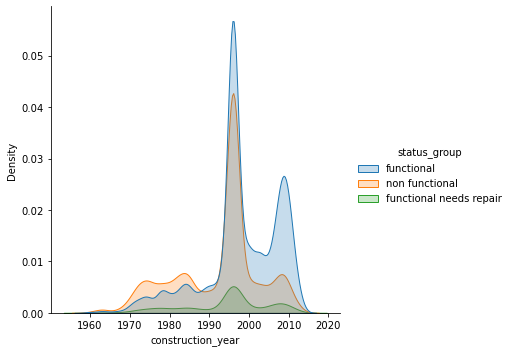

In [41]:
sns.displot(data=clean_df, x='construction_year', hue='status_group', kind='kde', fill=True);

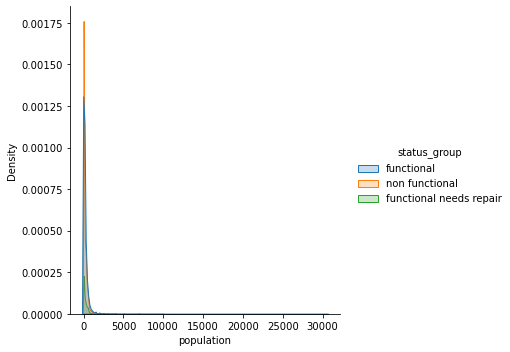

In [51]:
sns.displot(data=clean_df, x='population', hue='status_group', kind='kde', fill=True);

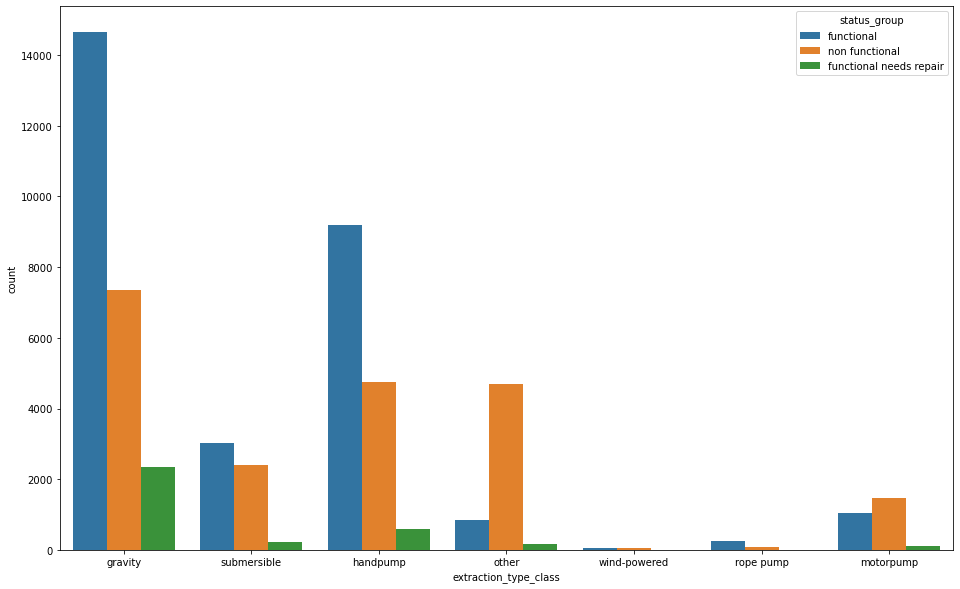

In [54]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x='extraction_type_class', hue='status_group', data=df)

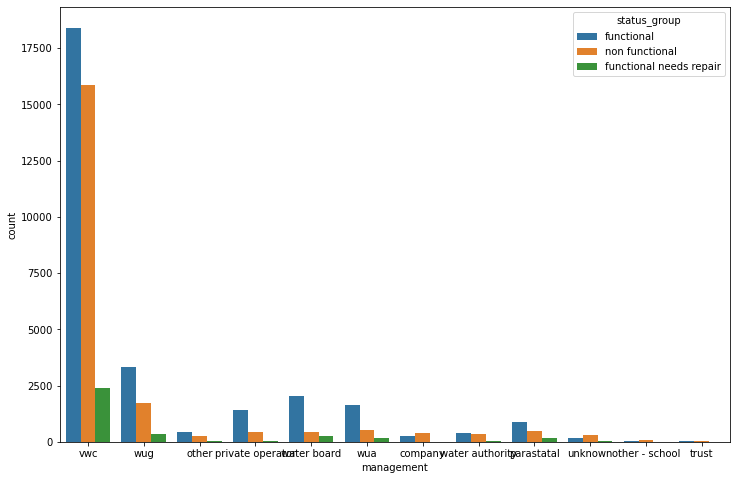

In [55]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='management', hue='status_group', data=df)

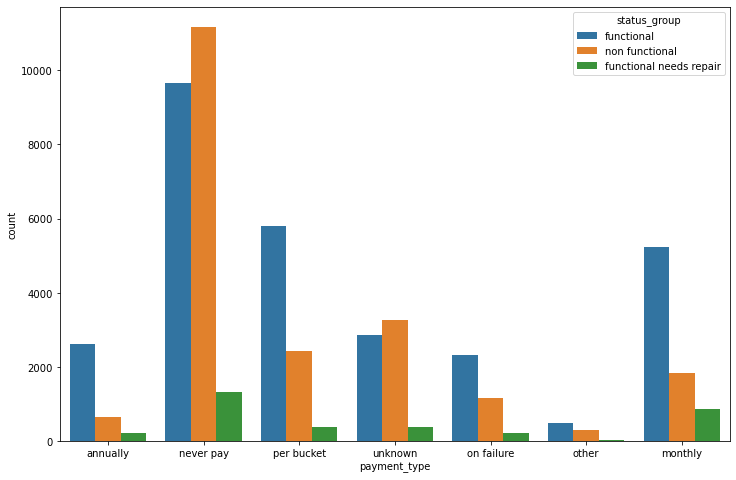

In [56]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='payment_type', hue='status_group', data=df)

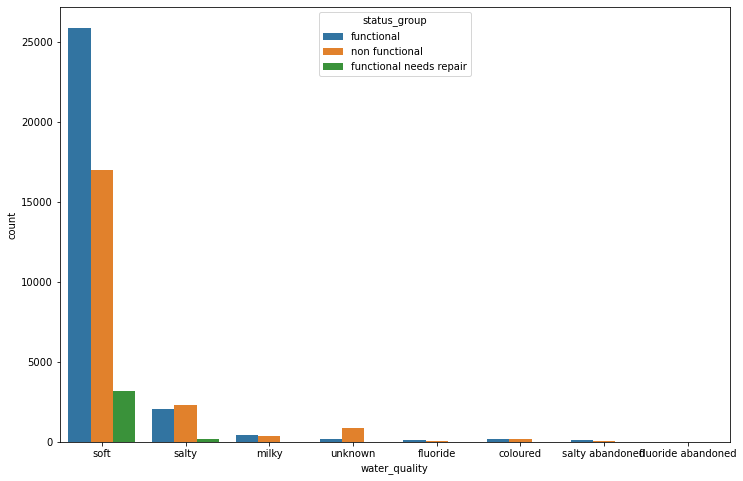

In [57]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='water_quality', hue='status_group', data=df)

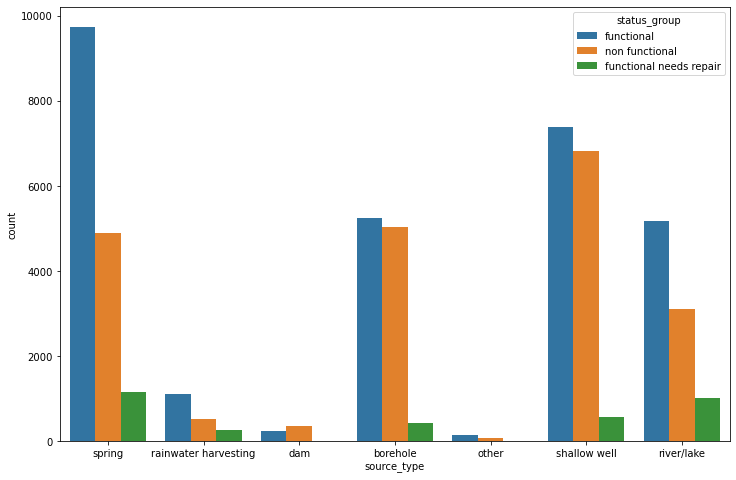

In [58]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='source_type', hue='status_group', data=df)

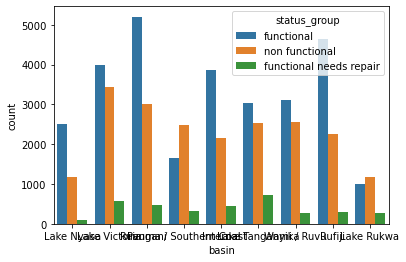

In [42]:
ax = sns.countplot(x='basin', hue='status_group', data=df)

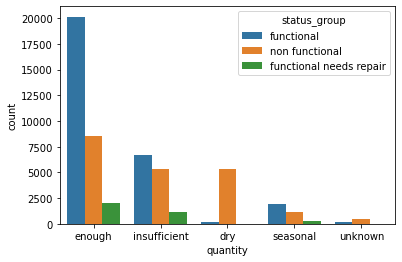

In [43]:
ax = sns.countplot(x='quantity', hue="status_group", data=df)

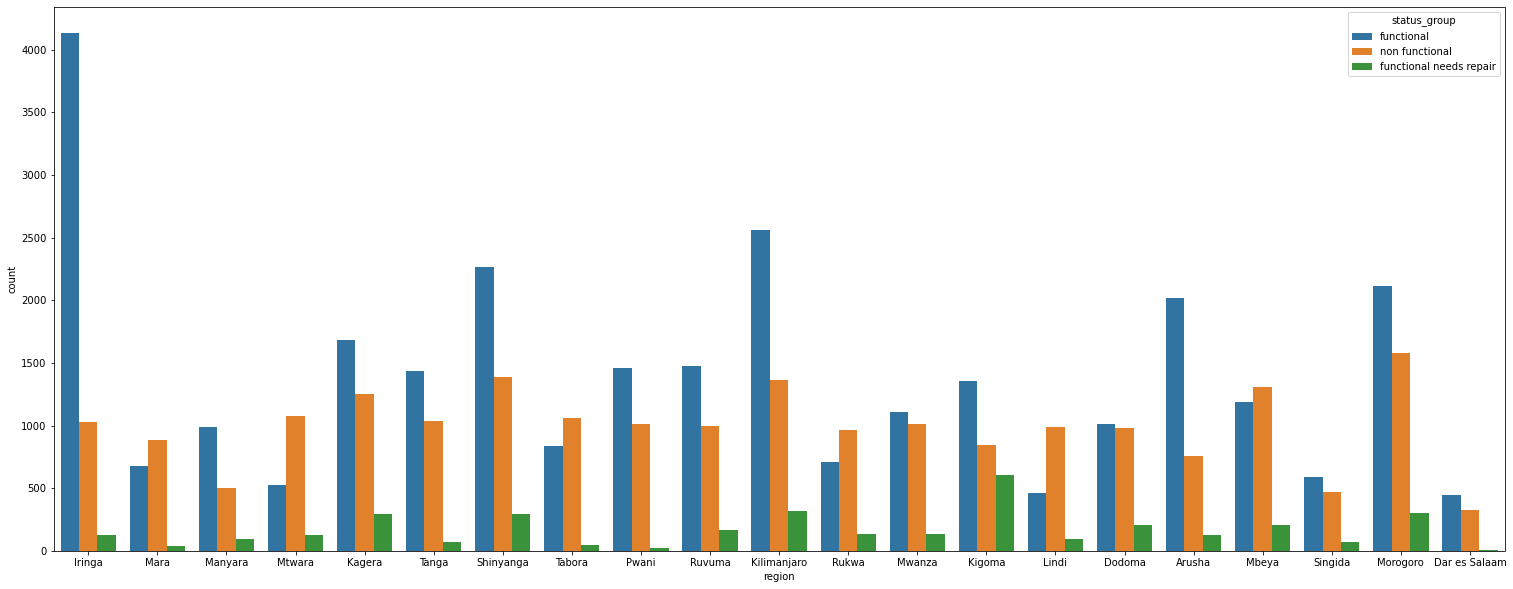

In [49]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='region', hue="status_group", data=df)

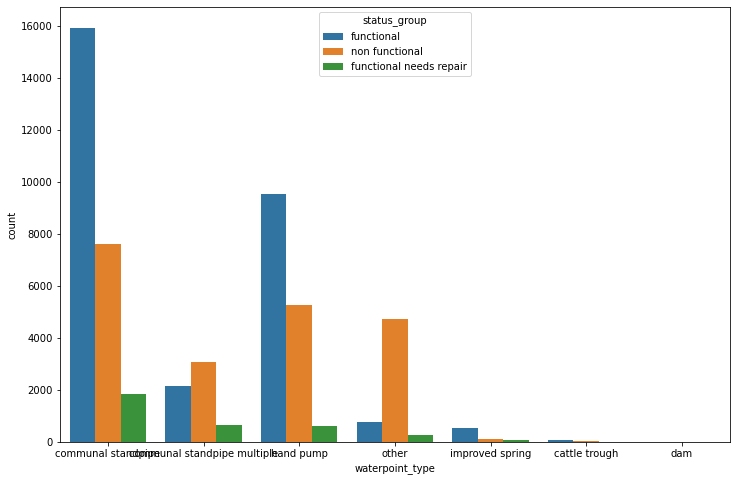

In [59]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='waterpoint_type', hue='status_group', data=df)

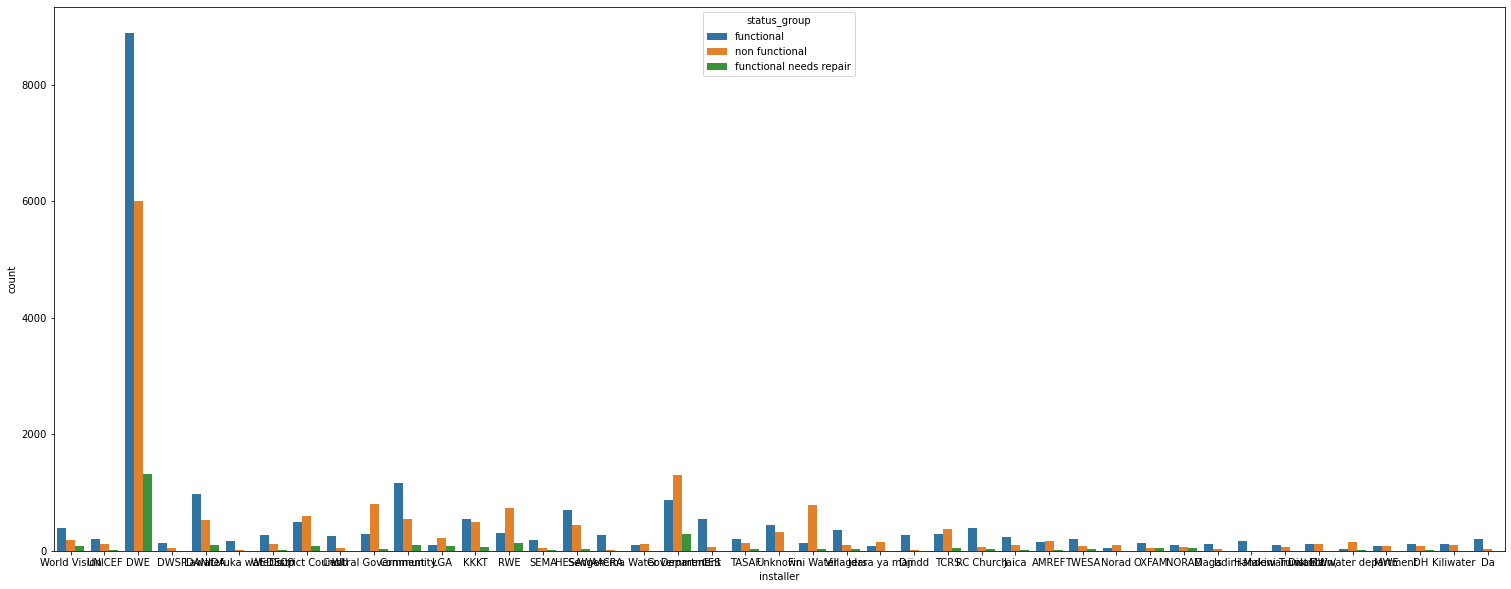

In [45]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='installer', hue="status_group", data=clean_df)

### Distribution of Data

### Categorical column boxplots

### Change status_group  to integer format

In [46]:
# Change status_group/target values to numeric values
df['status'] = df.status_group.map({"non functional":0, "functional needs repair":1, "functional":2})
df.head()

In [47]:
df = df.drop('status_group', axis=1)

## Modeling

In [ ]:
y = df['status']
X = df.drop(['status'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Statistics Function

In [ ]:
# function to calculate different types of model scores and cross validation score.
# at the end of the function, confusion matrix is plotted

def model_score(model, X, y_predict, y_true):
    acc = accuracy_score(y_predict, y_true)
    rec = recall_score(y_predict, y_true, average='weighted')
    f1 = f1_score(y_predict, y_true, average='weighted')
    prec = precision_score(y_predict, y_true, average='weighted')
    cross = cross_val_score(estimator=model, X=X, y=y_true, cv=10).mean()
    
    print(f' The accuracy score is: {round(acc, 4)}')
    print(f' The cross validation score of accuracy is: {round(cross, 4)}')
    print(f' The recall score is: {round(rec, 4)}')
    print(f' The F1 score is: {round(f1, 4)}')
    print(f' The precision score is: {round(prec, 4)}')
    
    return plot_confusion_matrix(model, X, y_true);§

### Dummy Classifier Model

In [ ]:
dummy = DummyClassifier(random_state=16)
dummy.fit(X_train_clean, y_train)
print(dummy.score(X_test_clean, y_test))

plot_confusion_matrix(dummy, X_test_clean, y_test);

### Logistic Regression

In [ ]:
# Import relevant class and function
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring="neg_log_loss")

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

In [ ]:
baseline_model = LogisticRegression(random_state=42)
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring="neg_log_loss")
baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

### K Neighbors

In [ ]:
knn_baseline_model = KNeighborsClassifier()

knn_baseline_log_loss = -cross_val_score(knn_baseline_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_baseline_log_loss

### Decision Tree Classifier

In [ ]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

In [ ]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [ ]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

### Random Forests

In [ ]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

In [ ]:
plot_feature_importances(forest)

### XG Boost

In [ ]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [ ]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

## Conclusions

Multiple linear regression analysis was used to build a model to predict housing prices in King County, WA. After 4 iterations from our baseline model, the results of the final regression model (Model D) indicated that 83 predictors explained 85.2% of the variance in the dataset(R2= 0.852). The RMSE of the final model was $108,603.30, which is the error in our price prediction. Difference between train and test set metrics showed that our model was not overfitted or underfitted.  All of the independent variables used in the model were significant predictors of sale price with p-values less than 0.05.

Following are features that have the most positive effect on sale price:

* For every 1 square foot of living space, the price is increased by 0.03%.
* Location is 2nd highest indicator of price. Our top 10 zipcodes (98039, 98004, 98112, 98109, 98119, 98102, 98105, 98040, 98199, 98107) were 142 to 281% higher in price than our baseline zipcode of 98001.

Following are features that have the most negative impact on sale price:
* Homes with a basement decreases the price by 6.11%.
* Homes with 3 floors decreases the price by 7.49%.  More floors is less desirable.

Following are some other notable conclusions:

* Price for homes with a waterfront are 64.5% higher than homes without a waterfront.
* Homes that have been renovated in the last 30 years will increase the price by 8.40%.
* Homes with a view rated as 4 (highest rating- i.e. Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, etc) increase the price by 45.59%.

Future work to improve on this model would be to make multiple models in different price ranges (i.e. 100k - 500k, 500k - 1 million, etc). Our model has limitations due to the wide range of prices in the dataset such as an error of $108,000 in predicting the price.  Another interesting extension to this project for future work is adding school districts grade into the model.